In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [25]:
rng = np.random.default_rng(seed=42)

#  Initiate a rangom 10 x 2 array:
X = rng.random((10,2))
X.shape

(10, 2)

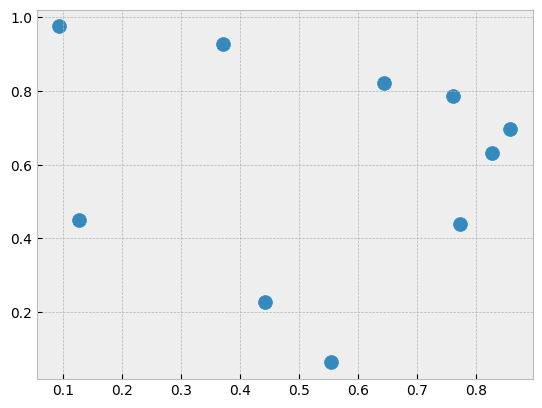

In [26]:
#  quick plot of the random points 
plt.style.use('bmh')
#  plot along X's Rows and Columns
plt.scatter(X[:, 0],X[:, 1], s=100)

In [27]:
#  computes the sum of squared distance between each pair
#  this is the sum of squared differences in each dimension
dist_eq = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1)
dist_eq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
#  determine the nearest values along the rows
#  this will return the index of the closest distance within the call
nearest = np.argsort(dist_eq, axis=1)
print(nearest)

[[0 9 1 3 7 6 8 5 4 2]
 [1 9 3 6 0 5 7 8 4 2]
 [2 5 4 6 3 9 1 7 0 8]
 [3 6 1 9 0 5 7 2 4 8]
 [4 7 2 5 8 6 0 3 9 1]
 [5 2 6 3 4 1 9 0 7 8]
 [6 3 1 9 5 0 2 7 4 8]
 [7 8 4 0 9 1 6 3 5 2]
 [8 7 0 4 9 1 3 6 5 2]
 [9 1 3 0 6 5 7 8 4 2]]


In [29]:
# to geth the closest nearest neighbor we will use argpartition with the supplied nearest neighbor
K = 2
nearest_partition = np.argpartition(dist_eq, K+1, axis=1)
nearest_partition

array([[0, 9, 1, 3, 7, 5, 6, 8, 4, 2],
       [1, 9, 3, 6, 0, 5, 2, 7, 8, 4],
       [2, 5, 4, 6, 3, 9, 1, 7, 8, 0],
       [6, 3, 1, 9, 0, 5, 2, 7, 8, 4],
       [7, 2, 4, 5, 8, 6, 0, 1, 3, 9],
       [5, 2, 6, 3, 1, 4, 9, 7, 8, 0],
       [3, 6, 1, 9, 5, 0, 2, 7, 8, 4],
       [7, 4, 8, 0, 1, 5, 6, 3, 2, 9],
       [7, 0, 8, 4, 1, 5, 6, 3, 2, 9],
       [3, 9, 1, 0, 2, 5, 6, 7, 8, 4]])

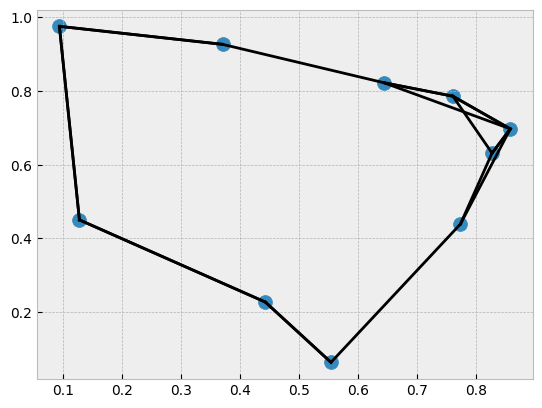

In [30]:
# plot these networks of neighbors
plt.scatter(X[:,0], X[:,1], s=100)

#  draw a line for the nearest neighbors
# go through each element count our case its 10
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        #  plot a line from X[i] to X[j]
        # use some zip magic to make it happen
        plt.plot(*zip(X[j], X[i]), color='black')